In [515]:
import pandas as pd

In [516]:
import numpy as np

In [517]:
df=pd.read_excel("training_data.xlsx")

In [518]:
df.head(10)

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Fever (temperature ≥37·3°C),Average temperature (celsius),Max temperature (celsius),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Disease Severity Asymptomatic,Disease Severity General,Disease Severity Severe,Disease Severity Critical,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Lymphocyte Count (10^9/L) - LQ,Lymphocyte Count (10^9/L) - UQ,Platelet Count (10^9/L) - Median,Platelet Count (10^9/L) - LQ,...,Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Mortality,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,1,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,0.0168,NaN,NaN,0.0168,0.1200,0.9400,NaN,NaN,0.2900,0.7900,NaN,NaN,0.2300,0.1500,0.2303,0.0471,0.0400,NaN,NaN,0.3770,0.3455,0.2775,6.2,4.5,9.5,1.0,0.6,1.3,206.0,155.0,...,0.1466,8,11,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Severe/Critical Only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,0.0000,NaN,NaN,0.0370,0.2037,0.9444,NaN,NaN,0.6296,0.7222,NaN,NaN,0.2593,0.1481,0.2778,0.0370,0.0556,NaN,NaN,0.0000,0.2222,0.7778,9.8,6.9,13.9,0.6,0.5,0.8,165.5,107.0,...,0.5000,8,7.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,0.0700,NaN,NaN,0.0000,0.0803,0.9416,NaN,NaN,0.1606,0.8175,NaN,NaN,0.2190,0.1533,0.2117,0.0511,0.0292,NaN,NaN,0.5255,0.3942,0.0803,5.2,4.3,7.7,1.1,0.8,1.5,220.0,168.0,...,0.0073,7,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,0.0300,NaN,0.065,NaN,NaN,0.9150,36.50,NaN,0.1880,NaN,NaN,NaN,NaN,NaN,NaN,0.0206,0.0425,0.010,NaN,NaN,NaN,NaN,7.0,5.1,9.4,0.9,0.6,1.2,207.0,158.0,...,0.0365,10,15,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,0.0510,NaN,0.051,NaN,NaN,0.8990,36.50,NaN,0.2160,NaN,NaN,NaN,NaN,NaN,NaN,0.0420,0.0950,0.021,NaN,NaN,NaN,NaN,7.3,5.3,9.6,0.8,0.6,1.4,201.0,155.0,...,0.0110,6,14,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,All,Both,NaN,0.5900,NaN,NaN,0.1300,NaN,NaN,0.0100,NaN,0.080,NaN,NaN,0.9300,36.50,NaN,0.1600,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.000,NaN,NaN,NaN,NaN,6.9,4.9,9.1,0.9,0.5,1.2,210.0,163.0,...,0.0610,11,16,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,All,Both,49.5,0.5200,0.2600,0.1500,0.1200,0.1000,0.1100,0.0500,0.09,0.070,0.0400,0.1600,0.7300,37.93,37.93,NaN,0.5900,0.42,0.06,0.1900,0.0900,0.0900,0.0400,0.0500,0.010,0.1851,NaN,NaN,NaN,8.1,4.7,11.5,1.1,0.8,1.4,212.2,112.5,...,NaN,NaN,23.2,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [519]:
df.describe()

,ID,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Fever (temperature ≥37·3°C),Average temperature (celsius),Max temperature (celsius),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Disease Severity Asymptomatic,Disease Severity General,Disease Severity Severe,Disease Severity Critical,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Lymphocyte Count (10^9/L) - LQ,Lymphocyte Count (10^9/L) - UQ,Platelet Count (10^9/L) - Median,Platelet Count (10^9/L) - LQ,Platelet Count (10^9/L) - UQ,Hemoglobin (g/L) - Median,...,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
count,475.000000,252.000000,430.000000,222.00000,309.000000,325.000000,295.000000,262.000000,233.000000,192.000000,173.000000,250.000000,199.000000,356.000000,64.000000,54.000000,38.000000,340.000000,243.000000,175.000000,160.000000,197.000000,221.000000,260.000000,171.000000,81.000000,167.00000,229.000000,214.000000,199.000000,284.000000,253.000000,251.000000,289.000000,237.000000,237.000000,180.000000,162.000000,162.000000,134.000000,...,199.000000,76.000000,101.000000,43.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,9.000000,11.000000,10.000000,10.000000,8.000000,4.000000,4.000000,4.00000,14.000000,14.000000,4.000000,9.000000,3.000000,13.000000,11.000000,8.000000,15.000000,36.000000
mean,94.324211,51.093536,0.547413,0.48413,0.286662,0.147790,0.142180,0.066283,0.075804,0.037113,0.104421,0.044744,0.160487,0.706176,36.474891,38.408778,0.234295,0.603716,0.288274,0.121554,0.275512,0.225184,0.330612,0.144762,0.107010,0.117175,0.07853,0.516531,0.304105,0.303799,6.058345,4.751225,7.706295,1.587924,1.381983,2.058692,186.339222,145.298519,233.919198,125.731493,...,0.842674,0.095805,0.105184,0.114935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.553333,1.186667,169.272727,120.350000,215.200000,70.175000,11.162500,13.600000,25.91750,23.832143,34.110714,0.807250,0.764589,0.066667,0.101615,0.177909,11.375000,20.873333,0.142222
std,51.058213,18.572915,0.263608,0.35929,0.288207,0.201715,0.241088,0.150995,0.212610,0.090475,0.450986,0.116095,0.269377,0.298083,6.567408,0.724731,0.300278,0.285895,0.301333,0.185448,0.257751,0.275312,0.280192,0.253176,0.216675,0.199007,0.24972,0.444439,0.388665,0.436035,2.196594,2.049314,3.331050,3.320552,3.316809,3.720481,38.775387,46.873641,55.891596,25.954569,...,0.276362,0.186147,0.164716,0.186450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.173997,0.182003,42.909418,40.199537,51.600065,61.583735,0.193111,0.294392,15.69335,7.519759,9.481484,0.169224,0.298162,0.020817,0.138349,0.219794,14.411677,10.863995,0.255568
min,1.000000,0.170000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.341000,36.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.290000,1.290000,1.290000,0.060000,0.200000,0.260000,77.000000,30.000000,86.000000,6.710000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0.9

In [520]:
df.isnull().sum()

ID               0
Severity        17
Ventilation    174
Mean Age       223
% Male          45
              ... 
Unnamed: 86    462
Unnamed: 87    464
Unnamed: 88    467
Unnamed: 89    460
Unnamed: 90    439
Length: 91, dtype: int64

In [521]:
df.shape

(475, 91)

In [522]:
df.columns

Index(['ID', 'Severity', 'Ventilation', 'Mean Age', '% Male',
       'Any Comorbidity', 'Hypertension', 'Diabetes',
       'Cardiovascular Disease (incl. CAD)', 'Chronic obstructive lung (COPD)',
       'Cancer (Any)', 'Liver Disease (any)', 'Cerebrovascular Disease',
       'Chronic kidney/renal disease', 'Other', 'Fever (temperature ≥37·3°C)',
       'Average temperature (celsius)', 'Max temperature (celsius)',
       'Respiratory rate > 24 breaths per min', 'Cough',
       'Shortness of Breath (dyspnoea)', 'Headache', 'Sputum (/Expectoration)',
       'Myalgia (Muscle Pain)', 'Fatigue', 'Diarrhoea', 'Nausea or Vomiting',
       'Loss of Appetite/Anorexia', 'Disease Severity Asymptomatic',
       'Disease Severity General', 'Disease Severity Severe',
       'Disease Severity Critical', 'White Blood Cell Count (10^9/L) - Median',
       'White Blood Cell Count (10^9/L) - LQ',
       'White Blood Cell Count (10^9/L) - UQ',
       'Lymphocyte Count (10^9/L) - Median', 'Lymphocyte Count 

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 91 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        475 non-null    int64  
 1   Severity                                  458 non-null    object 
 2   Ventilation                               301 non-null    object 
 3   Mean Age                                  252 non-null    float64
 4   % Male                                    430 non-null    float64
 5   Any Comorbidity                           222 non-null    float64
 6   Hypertension                              309 non-null    float64
 7   Diabetes                                  325 non-null    float64
 8   Cardiovascular Disease (incl. CAD)        295 non-null    float64
 9   Chronic obstructive lung (COPD)           262 non-null    float64
 10  Cancer (Any)                          

In [131]:
from collections import Counter

In [524]:
Counter(df['Mortality'])

Counter({0: 248,
         '0%%': 1,
         0.01: 28,
         0.02: 4,
         0.03: 3,
         0.04: 3,
         0.05: 4,
         0.06: 4,
         0.07: 8,
         0.08: 4,
         0.09: 4,
         0.1: 4,
         0.11: 6,
         0.12: 3,
         0.14: 4,
         0.15: 5,
         0.16: 1,
         0.17: 2,
         0.18: 1,
         0.19: 1,
         0.2: 10,
         0.21: 1,
         0.22: 3,
         0.23: 7,
         0.25: 4,
         0.26: 1,
         0.27: 1,
         0.28: 4,
         0.29: 2,
         0.3: 2,
         0.32: 1,
         0.34: 4,
         0.35: 2,
         0.36: 5,
         0.38: 1,
         0.39: 1,
         0.4: 2,
         0.41: 1,
         0.42: 1,
         0.45: 3,
         0.47: 1,
         0.48: 1,
         0.49: 1,
         0.5: 1,
         0.51: 2,
         0.52: 2,
         0.54: 1,
         0.55: 1,
         0.56: 4,
         0.58: 1,
         0.6: 2,
         0.62: 1,
         0.63: 1,
         0.64: 1,
         0.66: 1,
         0.67:

In [525]:
df['Mortality']=df['Mortality'].dropna()

In [526]:
df['Mortality'].shape

(475,)

In [527]:
df['Mortality'].dropna(inplace=True)

In [136]:
type(df['Mortality'])

pandas.core.series.Series

In [530]:
df.drop(df[df['Mortality']=='0%%'].index,inplace=True)

In [531]:
df.drop(df[df['Mortality']=='na'].index,inplace=True)

In [532]:
df['Mortality']=df['Mortality'].astype(np.float64)

In [533]:
df['Mortality'].shape

(471,)

In [535]:
df.shape

(471, 91)

In [536]:
null_data=int(.6*df.shape[0])

In [537]:
null_data

282

In [538]:
471-null_data

189

In [539]:
df.columns

Index(['ID', 'Severity', 'Ventilation', 'Mean Age', '% Male',
       'Any Comorbidity', 'Hypertension', 'Diabetes',
       'Cardiovascular Disease (incl. CAD)', 'Chronic obstructive lung (COPD)',
       'Cancer (Any)', 'Liver Disease (any)', 'Cerebrovascular Disease',
       'Chronic kidney/renal disease', 'Other', 'Fever (temperature ≥37·3°C)',
       'Average temperature (celsius)', 'Max temperature (celsius)',
       'Respiratory rate > 24 breaths per min', 'Cough',
       'Shortness of Breath (dyspnoea)', 'Headache', 'Sputum (/Expectoration)',
       'Myalgia (Muscle Pain)', 'Fatigue', 'Diarrhoea', 'Nausea or Vomiting',
       'Loss of Appetite/Anorexia', 'Disease Severity Asymptomatic',
       'Disease Severity General', 'Disease Severity Severe',
       'Disease Severity Critical', 'White Blood Cell Count (10^9/L) - Median',
       'White Blood Cell Count (10^9/L) - LQ',
       'White Blood Cell Count (10^9/L) - UQ',
       'Lymphocyte Count (10^9/L) - Median', 'Lymphocyte Count 

In [540]:
for i in df.columns:
  if(df[i].isnull().sum()>(df.shape[0]-null_data)):
    df.drop([i],inplace=True,axis=1)
  else:
    pass  

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 474
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  471 non-null    int64  
 1   Severity                            454 non-null    object 
 2   Ventilation                         297 non-null    object 
 3   % Male                              426 non-null    float64
 4   Hypertension                        305 non-null    float64
 5   Diabetes                            321 non-null    float64
 6   Cardiovascular Disease (incl. CAD)  294 non-null    float64
 7   Fever (temperature ≥37·3°C)         355 non-null    float64
 8   Cough                               339 non-null    float64
 9   Lymphocyte Count (10^9/L) - Median  288 non-null    float64
 10  Mortality                           471 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usa

In [544]:
df=df.drop(['ID'],axis=1)

In [545]:
df.head()

,Severity,Ventilation,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median,Mortality
0,All,Both,0.6230,0.3000,0.1900,0.0800,0.9400,0.7900,1.0,0.28
1,Severe/Critical Only,Both,0.7037,0.4815,0.3148,0.2407,0.9444,0.7222,0.6,1.00
2,All,Both,0.5912,0.2336,0.1387,0.0146,0.9416,0.8175,1.1,0.00
3,All,Both,0.6030,NaN,0.1160,NaN,0.9150,NaN,0.9,0.16
4,All,Both,0.6160,NaN,0.1010,NaN,0.8990,NaN,0.8,0.15


In [546]:
import matplotlib.pyplot as plt


In [547]:
import seaborn as sns


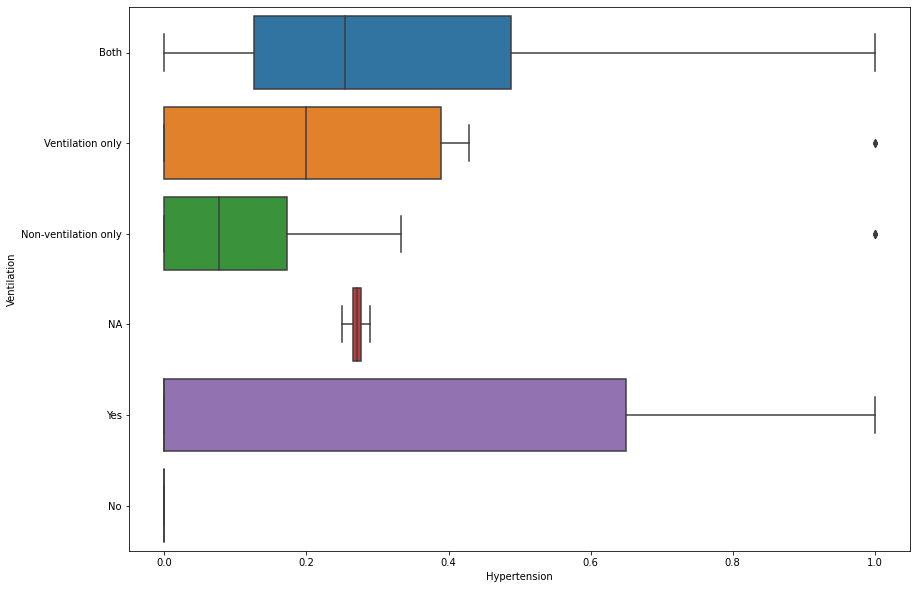

In [548]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Hypertension',y='Ventilation',data=df,orient='h')

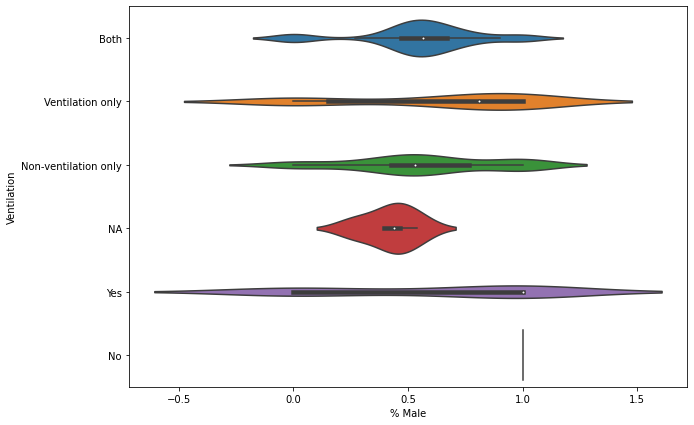

In [549]:
plt.figure(figsize=(10,7))
sns.violinplot(x='% Male',y='Ventilation',data=df,orient='h')

<Figure size 1008x720 with 0 Axes>

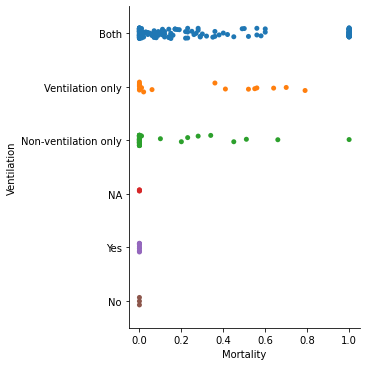

In [550]:
plt.figure(figsize=(14,10))
sns.catplot(x='Mortality',y='Ventilation',data=df,orient='h')

In [552]:
Counter(df['Severity'])

Counter({'All': 209,
         'Asymptomatic only': 1,
         'Both': 5,
         'Mild': 2,
         'Mild only': 91,
         'Severe': 1,
         'Severe/Critical Only': 143,
         'Severe/critical only': 2,
         nan: 17})

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 474
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  471 non-null    int64  
 1   Severity                            471 non-null    object 
 2   Ventilation                         471 non-null    object 
 3   % Male                              471 non-null    float64
 4   Hypertension                        471 non-null    float64
 5   Diabetes                            471 non-null    float64
 6   Cardiovascular Disease (incl. CAD)  471 non-null    float64
 7   Fever (temperature ≥37·3°C)         471 non-null    float64
 8   Cough                               471 non-null    float64
 9   Lymphocyte Count (10^9/L) - Median  471 non-null    float64
 10  Mortality                           471 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usa

In [646]:
new_df['Hypertension']=new_df['Hypertension'].interpolate(method='linear',limit_direction='both')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [647]:
new_df['Diabetes']=new_df['Diabetes'].interpolate(method='polynomial',limit_direction='forward',order=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [639]:
new_df['% Male']=new_df['% Male'].interpolate(method='values',limit_direction='backward')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [648]:
new_df.isnull().sum()

All                                   0
Both                                  0
Mild                                  0
Mild only                             0
Severe/Critical Only                  0
Severe/critical only                  0
Both                                  0
No                                    0
Non-ventilation only                  0
Ventilation only                      0
% Male                                0
Hypertension                          0
Diabetes                              0
Cardiovascular Disease (incl. CAD)    0
Fever (temperature ≥37·3°C)           0
Cough                                 0
Lymphocyte Count (10^9/L) - Median    0
Mortality                             0
dtype: int64

In [641]:
new_df['Cardiovascular Disease (incl. CAD)']=new_df['Cardiovascular Disease (incl. CAD)'].interpolate(method='linear',limit_direction='both')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [642]:
new_df['Fever (temperature ≥37·3°C)']=new_df['Fever (temperature ≥37·3°C)'].interpolate(method='cubic',limit_direction='both')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [643]:
new_df['Cough']=new_df['Cough'].interpolate(method='linear',limit_direction='both')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [644]:
new_df['Lymphocyte Count (10^9/L) - Median']=new_df['Lymphocyte Count (10^9/L) - Median'].interpolate(method='values',limit_direction='forward')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [632]:
df.head(4)

,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median,Mortality
0,0.6230,0.3000,0.1900,0.08000,0.9400,0.790000,1.0,0.28
1,0.7037,0.4815,0.3148,0.24070,0.9444,0.722200,0.6,1.00
2,0.5912,0.2336,0.1387,0.01460,0.9416,0.817500,1.1,0.00
3,0.6030,0.2127,0.1160,0.03595,0.9150,0.760625,0.9,0.16


In [633]:
df.describe()

,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median,Mortality
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,0.547625,0.284650,0.159626,0.142775,0.522389,0.597886,1.717265,0.188896
std,0.250890,0.247661,0.244247,0.209709,1.081816,0.262356,3.397941,0.323967
min,0.000000,0.000000,-0.537828,0.000000,-5.909242,0.000000,0.060000,0.000000
25%,0.460500,0.114000,0.000000,0.021167,0.530300,0.467850,0.780000,0.000000
50%,0.538000,0.236000,0.102559,0.078857,0.789500,0.636000,0.940000,0.000000
75%,0.661167,0.400000,0.226500,0.159500,0.940000,0.757643,1.300000,0.230000
max,1.000000,1.000000,1.000000,1.000000,2.015146,1.000000,30.600000,1.000000


In [554]:
Counter(df['Ventilation'])

Counter({'Both': 196,
         'No': 3,
         'Non-ventilation only': 65,
         'Ventilation only': 18,
         'Yes': 11,
         nan: 174,
         'ΝΑ': 4})

In [555]:
df['Ventilation'].isnull().sum()

174

In [556]:
df['Ventilation']=df['Ventilation'].replace(np.nan,'No')

In [557]:
df['Ventilation'].isnull().sum()

0

In [558]:
dummy_vent=pd.get_dummies(df['Ventilation'])
dumm_sev=pd.get_dummies(df['Severity'])

In [492]:
dummy_vent.columns

Index(['Both', 'No', 'Non-ventilation only', 'Ventilation only', 'Yes', 'ΝΑ'], dtype='object')

In [563]:
dummy_vent=dummy_vent.drop(['ΝΑ'],axis=1)

In [564]:
dumm_sev.columns , dummy_vent.columns

(Index(['All', 'Asymptomatic only', 'Both', 'Mild', 'Mild only', 'Severe',
        'Severe/Critical Only', 'Severe/critical only'],
       dtype='object'),
 Index(['Both', 'No', 'Non-ventilation only', 'Ventilation only', 'Yes'], dtype='object'))

In [560]:
frame.columns

Index(['All', 'Both', 'Mild Only', 'Mild only', 'Severe/Critical Only',
       'Severe/critical only', 'Both', 'No', 'Non-ventilation only',
       'Ventilation only', '% Male', 'Hypertension', 'Diabetes',
       'Fever (temperature ≥37·3°C)', 'Cardiovascular Disease (incl. CAD)',
       'Cough', 'Lymphocyte Count (10^9/L) - Median'],
      dtype='object')

In [649]:
dummy_vent.shape

(471, 5)

In [566]:
df.head()

,Severity,Ventilation,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median,Mortality
0,All,Both,0.6230,0.3000,0.1900,0.0800,0.9400,0.7900,1.0,0.28
1,Severe/Critical Only,Both,0.7037,0.4815,0.3148,0.2407,0.9444,0.7222,0.6,1.00
2,All,Both,0.5912,0.2336,0.1387,0.0146,0.9416,0.8175,1.1,0.00
3,All,Both,0.6030,NaN,0.1160,NaN,0.9150,NaN,0.9,0.16
4,All,Both,0.6160,NaN,0.1010,NaN,0.8990,NaN,0.8,0.15


In [567]:
df.drop(['Severity','Ventilation'],axis=1,inplace=True)

In [594]:
df.head()

,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median,Mortality
0,0.6230,0.3000,0.1900,0.0800,0.9400,0.7900,1.0,0.28
1,0.7037,0.4815,0.3148,0.2407,0.9444,0.7222,0.6,1.00
2,0.5912,0.2336,0.1387,0.0146,0.9416,0.8175,1.1,0.00
3,0.6030,NaN,0.1160,NaN,0.9150,NaN,0.9,0.16
4,0.6160,NaN,0.1010,NaN,0.8990,NaN,0.8,0.15


In [568]:
new_df=pd.concat([dumm_sev,dummy_vent,df],axis=1)

In [637]:
new_df.shape

(471, 18)

In [650]:
new_df.isnull().sum()

All                                   0
Both                                  0
Mild                                  0
Mild only                             0
Severe/Critical Only                  0
Severe/critical only                  0
Both                                  0
No                                    0
Non-ventilation only                  0
Ventilation only                      0
% Male                                0
Hypertension                          0
Diabetes                              0
Cardiovascular Disease (incl. CAD)    0
Fever (temperature ≥37·3°C)           0
Cough                                 0
Lymphocyte Count (10^9/L) - Median    0
Mortality                             0
dtype: int64

In [576]:
new_df=new_df.drop(['Asymptomatic only','Severe','Yes'],axis=1)

In [596]:
new_df.head(2)

,All,Both,Mild,Mild only,Severe/Critical Only,Severe/critical only,Both,No,Non-ventilation only,Ventilation only,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median,Mortality
0,1,0,0,0,0,0,1,0,0,0,0.6230,0.3000,0.1900,0.0800,0.9400,0.7900,1.0,0.28
1,0,0,0,0,1,0,1,0,0,0,0.7037,0.4815,0.3148,0.2407,0.9444,0.7222,0.6,1.00


In [597]:
frame.head(2)

,All,Both,Mild Only,Mild only,Severe/Critical Only,Severe/critical only,Both,No,Non-ventilation only,Ventilation only,% Male,Hypertension,Diabetes,Fever (temperature ≥37·3°C),Cardiovascular Disease (incl. CAD),Cough,Lymphocyte Count (10^9/L) - Median
0,0,0,0,1,0,0,1,0,0,0,0.341,0.151,0.119,0.730000,0.063,0.611000,1.30
1,0,0,0,0,1,0,1,0,0,0,0.750,0.250,0.170,0.906098,0.110,0.601125,1.22


In [651]:
new_df.shape

(471, 18)

In [599]:
frame.shape

(53, 17)

In [600]:
new_df.describe()

,All,Both,Mild,Mild only,Severe/Critical Only,Severe/critical only,Both,No,Non-ventilation only,Ventilation only,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median,Mortality
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,426.000000,305.000000,321.000000,294.000000,355.000000,339.000000,288.000000,471.000000
mean,0.443737,0.010616,0.004246,0.193206,0.303609,0.004246,0.416136,0.375796,0.138004,0.038217,0.547131,0.284684,0.148729,0.142663,0.705348,0.602547,1.572257,0.188896
std,0.497353,0.102593,0.065094,0.395233,0.460305,0.065094,0.493441,0.484843,0.345271,0.191923,0.262453,0.287592,0.202673,0.241356,0.298094,0.285502,3.315615,0.323967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.451175,0.078000,0.000000,0.000000,0.563000,0.459500,0.777500,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540100,0.202900,0.101000,0.060750,0.791000,0.643000,0.975000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.670000,0.389000,0.183000,0.150750,0.940500,0.794000,1.300000,0.230000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.600000,1.000000


In [601]:
from sklearn.preprocessing import MinMaxScaler 

In [602]:
sc=MinMaxScaler()

In [652]:
X_train=new_df.iloc[:,:17]

In [653]:
X_train

,All,Both,Mild,Mild only,Severe/Critical Only,Severe/critical only,Both,No,Non-ventilation only,Ventilation only,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median
0,1,0,0,0,0,0,1,0,0,0,0.6230,0.3000,0.1900,0.08000,0.9400,0.790000,1.00
1,0,0,0,0,1,0,1,0,0,0,0.7037,0.4815,0.3148,0.24070,0.9444,0.722200,0.60
2,1,0,0,0,0,0,1,0,0,0,0.5912,0.2336,0.1387,0.01460,0.9416,0.817500,1.10
3,1,0,0,0,0,0,1,0,0,0,0.6030,0.2127,0.1160,0.03595,0.9150,0.760625,0.90
4,1,0,0,0,0,0,1,0,0,0,0.6160,0.1918,0.1010,0.05730,0.8990,0.703750,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0,0,0,0,1,0,0,1,0,0,0.6630,0.3880,0.1220,0.09200,0.8570,0.704000,0.58
471,0,0,0,0,0,0,1,0,0,0,0.6600,0.6300,0.3600,0.19000,0.7100,0.660000,0.80
472,0,0,0,0,1,0,1,0,0,0,0.5900,0.4336,0.2368,0.07020,0.3665,0.660000,0.80
473,0,0,0,0,1,0,1,0,0,0,0.5600,0.4600,0.2500,0.09000,0.3500,0.660000,0.80


In [656]:
X_train_scaled=sc.fit_transform(X_train)

In [655]:
X_train.isnull().sum()

All                                   0
Both                                  0
Mild                                  0
Mild only                             0
Severe/Critical Only                  0
Severe/critical only                  0
Both                                  0
No                                    0
Non-ventilation only                  0
Ventilation only                      0
% Male                                0
Hypertension                          0
Diabetes                              0
Cardiovascular Disease (incl. CAD)    0
Fever (temperature ≥37·3°C)           0
Cough                                 0
Lymphocyte Count (10^9/L) - Median    0
dtype: int64

In [657]:
X_train_scaled

array([[1.        , 0.        , 0.        , ..., 0.86432442, 0.79      ,
        0.03077931],
       [0.        , 0.        , 0.        , ..., 0.86487966, 0.7222    ,
        0.01768173],
       [1.        , 0.        , 0.        , ..., 0.86452632, 0.8175    ,
        0.0340537 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.7919529 , 0.66      ,
        0.02423052],
       [0.        , 0.        , 0.        , ..., 0.78987072, 0.66      ,
        0.02423052],
       [0.        , 0.        , 0.        , ..., 0.79618035, 0.66      ,
        0.02095612]])

In [658]:
y_train.shape

(471,)

In [272]:
from sklearn.model_selection import train_test_split

In [659]:
X_train, y_train

(     All  Both  ...     Cough  Lymphocyte Count (10^9/L) - Median
 0      1     0  ...  0.790000                                1.00
 1      0     0  ...  0.722200                                0.60
 2      1     0  ...  0.817500                                1.10
 3      1     0  ...  0.760625                                0.90
 4      1     0  ...  0.703750                                0.80
 ..   ...   ...  ...       ...                                 ...
 470    0     0  ...  0.704000                                0.58
 471    0     0  ...  0.660000                                0.80
 472    0     0  ...  0.660000                                0.80
 473    0     0  ...  0.660000                                0.80
 474    0     0  ...  0.660000                                0.70
 
 [471 rows x 17 columns], 0      0.28
 1      1.00
 2      0.00
 3      0.16
 4      0.15
        ... 
 470    0.56
 471    0.58
 472    1.00
 473    0.00
 474    0.00
 Name: Mortality, Length: 

In [619]:
X_train.shape

(471, 17)

In [306]:
from sklearn.ensemble import RandomForestRegressor

In [660]:
rf=RandomForestRegressor()

In [661]:
rf.fit(X_train_scaled,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [312]:
df_test=pd.read_excel('test_data.xlsx')

In [314]:
df_test.shape


(53, 54)

In [408]:
Counter(df_test['Ventilation'])

Counter({'Both': 38, 'Non-ventilation only': 2, 'Ventilation only': 6, nan: 7})

In [434]:
X_train.head()

,All,Asymptomatic only,Both,Mild,Mild only,Severe,Severe/Critical Only,Severe/critical only,Both,No,Non-ventilation only,Ventilation only,Yes,ΝΑ,ID,% Male,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Fever (temperature ≥37·3°C),Cough,Lymphocyte Count (10^9/L) - Median
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.6230,0.3000,0.1900,0.08000,0.9400,0.790000,1.0
1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0.7037,0.4815,0.3148,0.24070,0.9444,0.722200,0.6
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.5912,0.2336,0.1387,0.01460,0.9416,0.817500,1.1
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0.6030,0.2127,0.1160,0.03595,0.9150,0.760625,0.9
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0.6160,0.1918,0.1010,0.05730,0.8990,0.703750,0.8


In [675]:
df_test.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Fever (temperature ≥37·3°C),Average temperature (celsius),Max temperature (celsius),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Disease Severity Asymptomatic,Disease Severity General,Disease Severity Severe,Disease Severity Critical,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Lymphocyte Count (10^9/L) - LQ,Lymphocyte Count (10^9/L) - UQ,Platelet Count (10^9/L) - Median,Platelet Count (10^9/L) - LQ,Platelet Count (10^9/L) - UQ,Hemoglobin (g/L) - Median,Hemoglobin (g/L) - LQ,Hemoglobin (g/L) - UQ,Albumin (g/L),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days"
0,155,Mild only,Both,48.900000,0.3410,0.325,0.1510,0.1190,0.0630,NaN,0.0630,NaN,NaN,0.032,NaN,0.730,0.611,NaN,NaN,0.6110,NaN,0.103,NaN,0.0320,NaN,0.2220,NaN,0.3730,0.0,1.0,0.0,0.0,4.50,NaN,NaN,1.30,NaN,NaN,219.00,NaN,NaN,NaN,NaN,NaN,NaN,23.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,156,Severe/Critical Only,Both,NaN,0.7500,0.680,0.2500,0.1700,0.1100,0.1100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,36.0,NaN,1.0,NaN,0.06,NaN,10.0,16.0
2,156,Severe/Critical Only,Ventilation only,NaN,0.7900,0.740,0.2600,0.2400,0.1800,0.1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,39.0,NaN,1.0,NaN,0.05,NaN,12.0,17.0
3,156,Severe/Critical Only,Non-ventilation only,NaN,0.6800,0.580,0.2100,0.0500,0.0000,0.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,35.0,NaN,1.0,NaN,0.06,NaN,0.0,13.0
4,157,All,Both,52.943333,0.4654,NaN,0.2121,0.0938,0.0733,0.0327,0.0366,0.03,NaN,NaN,NaN,0.808,NaN,NaN,NaN,0.5715,0.1835,0.049,0.2736,0.3062,0.4773,0.0736,0.0408,0.2284,NaN,NaN,NaN,NaN,5.53,NaN,NaN,0.98,NaN,NaN,181.53,NaN,NaN,127.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
## servity, ventilation , id , %Male ,Hypertension,diabetes ,cardiovascular, fever , cough ,lymphocyte
df_test.columns

Index(['ID', 'Severity', 'Ventilation', 'Mean Age', '% Male',
       'Any Comorbidity', 'Hypertension', 'Diabetes',
       'Cardiovascular Disease (incl. CAD)', 'Chronic obstructive lung (COPD)',
       'Cancer (Any)', 'Liver Disease (any)', 'Cerebrovascular Disease',
       'Chronic kidney/renal disease', 'Other', 'Fever (temperature ≥37·3°C)',
       'Average temperature (celsius)', 'Max temperature (celsius)',
       'Respiratory rate > 24 breaths per min', 'Cough',
       'Shortness of Breath (dyspnoea)', 'Headache', 'Sputum (/Expectoration)',
       'Myalgia (Muscle Pain)', 'Fatigue', 'Diarrhoea', 'Nausea or Vomiting',
       'Loss of Appetite/Anorexia', 'Disease Severity Asymptomatic',
       'Disease Severity General', 'Disease Severity Severe',
       'Disease Severity Critical', 'White Blood Cell Count (10^9/L) - Median',
       'White Blood Cell Count (10^9/L) - LQ',
       'White Blood Cell Count (10^9/L) - UQ',
       'Lymphocyte Count (10^9/L) - Median', 'Lymphocyte Count 

In [331]:
frame=pd.DataFrame(data=df_test,columns=['Severity','Ventilation','% Male','Hypertension','Diabetes','Fever (temperature ≥37·3°C)','Cardiovascular Disease (incl. CAD)','Cough','Lymphocyte Count (10^9/L) - Median'])

In [384]:
frame.head()

,All,Both,Mild Only,Mild only,Severe/Critical Only,Severe/critical only,Both,No,Non-ventilation only,Ventilation only,% Male,Hypertension,Diabetes,Fever (temperature ≥37·3°C),Cardiovascular Disease (incl. CAD),Cough,Lymphocyte Count (10^9/L) - Median
0,0,0,0,1,0,0,1,0,0,0,0.3410,0.1510,0.1190,0.730000,0.0630,0.611000,1.30
1,0,0,0,0,1,0,1,0,0,0,0.7500,0.2500,0.1700,0.906098,0.1100,0.601125,1.22
2,0,0,0,0,1,0,0,0,0,1,0.7900,0.2600,0.2400,0.942318,0.1800,0.591250,1.14
3,0,0,0,0,1,0,0,0,1,0,0.6800,0.2100,0.0500,0.891879,0.0000,0.581375,1.06
4,1,0,0,0,0,0,1,0,0,0,0.4654,0.2121,0.0938,0.808000,0.0733,0.571500,0.98


In [333]:
frame.shape

(53, 9)

In [334]:
frame.isnull().sum()

Severity                               0
Ventilation                            7
% Male                                 8
Hypertension                          27
Diabetes                              23
Fever (temperature ≥37·3°C)           16
Cardiovascular Disease (incl. CAD)    18
Cough                                 27
Lymphocyte Count (10^9/L) - Median    35
dtype: int64

In [411]:
Counter(df_test['Severity'])

Counter({'All': 36,
         'Both': 4,
         'Mild Only': 1,
         'Mild only': 2,
         'Severe/Critical Only': 9,
         'Severe/critical only': 1})

In [ ]:
frame[]

In [336]:
frame['Ventilation']=frame['Ventilation'].replace(np.nan,'No')

In [339]:
dummy_vent_test=pd.get_dummies(frame['Ventilation'])
dumm_sev_test=pd.get_dummies(frame['Severity'])

In [341]:
dumm_sev_test

,All,Both,Mild Only,Mild only,Severe/Critical Only,Severe/critical only
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0
7,1,0,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


In [344]:
frame.drop(['Severity','Ventilation'],axis=1,inplace=True)

In [349]:
frame=pd.concat([dumm_sev_test,dummy_vent_test,frame],axis=1)

In [387]:
frame['Fever (temperature ≥37·3°C)']=frame['Fever (temperature ≥37·3°C)'].replace(np.nan,0.7345)

In [388]:
frame['Fever (temperature ≥37·3°C)'].isnull().sum()

0

In [351]:
frame.shape

(53, 17)

In [352]:
frame['Lymphocyte Count (10^9/L) - Median']=frame['Lymphocyte Count (10^9/L) - Median'].interpolate(method='values',limit_direction='forward')

In [354]:
frame['Cough']=frame['Cough'].interpolate(method='linear',limit_direction='both')

In [371]:
frame['Fever (temperature ≥37·3°C)']=frame['Fever (temperature ≥37·3°C)'].interpolate(method='cubic',limit_direction='both')

In [360]:
frame['Cardiovascular Disease (incl. CAD)']=frame['Cardiovascular Disease (incl. CAD)'].interpolate(method='linear',limit_direction='both')

In [372]:
frame['% Male']=frame['% Male'].interpolate(method='values',limit_direction='backward')

In [369]:
frame['Diabetes']=frame['Diabetes'].interpolate(method='polynomial',limit_direction='forward',order=2)

In [368]:
frame['Hypertension']=frame['Hypertension'].interpolate(method='linear',limit_direction='both')

In [379]:
frame.shape

(53, 17)

In [662]:
frame_scaled=sc.fit_transform(frame)

In [663]:
frame_scaled

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.341     , 0.23230769, 0.11298603, 0.57814299, 0.063     ,
        0.57945946, 0.7       ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.75      , 0.38461538, 0.16140862, 0.71760873, 0.11      ,
        0.56878378, 0.62      ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.79      , 0.4       , 0.22787099, 0.74629412, 0.18      ,
        0.55810811, 0.54      ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.68      , 0.32307692, 0.04747312, 0.7063475 , 0.        ,
        0.54743243, 0.46      ],
       [1.        , 0.        , 0.        , 0.      

In [664]:
frame.shape

(53, 17)

In [667]:
frame.shape

(53, 17)

In [668]:
X_train.shape

(471, 17)

In [665]:
frame.columns

Index(['All', 'Both', 'Mild Only', 'Mild only', 'Severe/Critical Only',
       'Severe/critical only', 'Both', 'No', 'Non-ventilation only',
       'Ventilation only', '% Male', 'Hypertension', 'Diabetes',
       'Fever (temperature ≥37·3°C)', 'Cardiovascular Disease (incl. CAD)',
       'Cough', 'Lymphocyte Count (10^9/L) - Median'],
      dtype='object')

In [666]:
X_train.columns

Index(['All', 'Both', 'Mild', 'Mild only', 'Severe/Critical Only',
       'Severe/critical only', 'Both', 'No', 'Non-ventilation only',
       'Ventilation only', '% Male', 'Hypertension', 'Diabetes',
       'Cardiovascular Disease (incl. CAD)', 'Fever (temperature ≥37·3°C)',
       'Cough', 'Lymphocyte Count (10^9/L) - Median'],
      dtype='object')

In [406]:
frame.head(2)

,All,Both,Mild Only,Mild only,Severe/Critical Only,Severe/critical only,Both,No,Non-ventilation only,Ventilation only,% Male,Hypertension,Diabetes,Fever (temperature ≥37·3°C),Cardiovascular Disease (incl. CAD),Cough,Lymphocyte Count (10^9/L) - Median
0,0,0,0,1,0,0,1,0,0,0,0.341,0.151,0.119,0.730000,0.063,0.611000,1.30
1,0,0,0,0,1,0,1,0,0,0,0.750,0.250,0.170,0.906098,0.110,0.601125,1.22


In [427]:
frame.shape

(53, 17)

In [669]:
pred=rf.predict(frame_scaled)

In [670]:
from sklearn.metrics import r2_score

In [672]:
pred.shape

(53,)

In [674]:
pred

array([0.9293, 0.9621, 0.9435, 0.9649, 0.9358, 0.9368, 0.9338, 0.925 ,
       0.9289, 0.9338, 0.9392, 0.9494, 0.9428, 0.9558, 0.8931, 0.9399,
       0.8768, 0.4447, 0.9473, 0.98  , 0.4728, 0.9611, 0.9266, 0.9121,
       0.9581, 0.936 , 0.9372, 0.9352, 0.9332, 0.9269, 0.882 , 0.8635,
       0.8584, 0.8603, 0.8607, 0.8598, 0.8635, 0.8658, 0.89  , 0.8757,
       0.8837, 0.8834, 0.8799, 0.8592, 0.8648, 0.8659, 0.8613, 0.8658,
       0.8639, 0.8657, 0.8732, 0.8571, 0.8855])